# Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [2]:
sns.set_context('talk')

# Load data

In [3]:
train = pd.read_pickle('train')

# Prepare data

In [10]:
# Target is whether the virus is detected
y = pd.to_numeric(train.WnvPresent.values)

In [11]:
# Remove unusable features from dataset
X = train.drop(
    ['Date', 'Trap', 'NumMosquitos', 'WnvPresent', 'Species', 'Zone'], axis=1)

In [12]:
# Split data preserving label ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

In [13]:
# Use borderline SMOTE to fix class imbalance
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X_train,
                                                                y_train)

# XG Boost

In [14]:
# Put data in container that XGBoost can use
dtrain = xgb.DMatrix(
    pd.DataFrame(
        X_resampled, columns=[x.replace(' ', '') for x in X_train.columns]),
    label=y_resampled)

# Remove spaces from feature names
X_test.columns = [x.replace(' ', '') for x in X_test.columns]

# Put validation data in XGBoost container
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 1000
param = {
    'eta': 0.05,
    'max_depth': 5,
    'gamma': 0.4,
    'alpha': 0.01,
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    'seed': 42
}

# Train, stopping after 100 rounds of AUC not improving in validation
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=200)

[0]	train-auc:0.92777	eval-auc:0.772269
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 200 rounds.
[1]	train-auc:0.92784	eval-auc:0.772091
[2]	train-auc:0.928005	eval-auc:0.772581
[3]	train-auc:0.928308	eval-auc:0.773172
[4]	train-auc:0.949879	eval-auc:0.784533
[5]	train-auc:0.950225	eval-auc:0.784906
[6]	train-auc:0.950534	eval-auc:0.784641
[7]	train-auc:0.951208	eval-auc:0.786463
[8]	train-auc:0.951743	eval-auc:0.787348
[9]	train-auc:0.954525	eval-auc:0.790169
[10]	train-auc:0.955648	eval-auc:0.789148
[11]	train-auc:0.956375	eval-auc:0.788768
[12]	train-auc:0.961413	eval-auc:0.789375
[13]	train-auc:0.964415	eval-auc:0.791209
[14]	train-auc:0.966793	eval-auc:0.792608
[15]	train-auc:0.968361	eval-auc:0.793311
[16]	train-auc:0.968686	eval-auc:0.793542
[17]	train-auc:0.969286	eval-auc:0.791244
[18]	train-auc:0.971159	eval-auc:0.792376
[19]	train-auc:0.971889	eval-auc:0.792579
[20]	train-auc:0.97196	eval-au

[191]	train-auc:0.993424	eval-auc:0.81245
[192]	train-auc:0.99344	eval-auc:0.812433
[193]	train-auc:0.993451	eval-auc:0.812424
[194]	train-auc:0.993464	eval-auc:0.812293
[195]	train-auc:0.993485	eval-auc:0.812351
[196]	train-auc:0.993505	eval-auc:0.812372
[197]	train-auc:0.993517	eval-auc:0.812549
[198]	train-auc:0.993548	eval-auc:0.812421
[199]	train-auc:0.99357	eval-auc:0.812162
[200]	train-auc:0.993587	eval-auc:0.812278
[201]	train-auc:0.993633	eval-auc:0.812147
[202]	train-auc:0.993652	eval-auc:0.8122
[203]	train-auc:0.993679	eval-auc:0.811944
[204]	train-auc:0.993696	eval-auc:0.811935
[205]	train-auc:0.993709	eval-auc:0.811684
[206]	train-auc:0.993728	eval-auc:0.81158
[207]	train-auc:0.993754	eval-auc:0.811661
[208]	train-auc:0.993769	eval-auc:0.811909
[209]	train-auc:0.993776	eval-auc:0.812043
[210]	train-auc:0.993794	eval-auc:0.812182
[211]	train-auc:0.993835	eval-auc:0.812342
[212]	train-auc:0.993858	eval-auc:0.812494
[213]	train-auc:0.993901	eval-auc:0.812762
[214]	train-auc:0

[383]	train-auc:0.996464	eval-auc:0.816871
[384]	train-auc:0.99648	eval-auc:0.817116
[385]	train-auc:0.996488	eval-auc:0.816964
[386]	train-auc:0.996496	eval-auc:0.816961
[387]	train-auc:0.996506	eval-auc:0.817066
[388]	train-auc:0.996534	eval-auc:0.81704
[389]	train-auc:0.996547	eval-auc:0.817063
[390]	train-auc:0.996556	eval-auc:0.817098
[391]	train-auc:0.996574	eval-auc:0.817037
[392]	train-auc:0.996584	eval-auc:0.816903
[393]	train-auc:0.996599	eval-auc:0.817017
[394]	train-auc:0.996612	eval-auc:0.817104
[395]	train-auc:0.996616	eval-auc:0.817034
[396]	train-auc:0.996618	eval-auc:0.817028
[397]	train-auc:0.996624	eval-auc:0.817124
[398]	train-auc:0.996631	eval-auc:0.816973
[399]	train-auc:0.996647	eval-auc:0.817037
[400]	train-auc:0.996665	eval-auc:0.817017
[401]	train-auc:0.996668	eval-auc:0.817017
[402]	train-auc:0.996676	eval-auc:0.817212
[403]	train-auc:0.99668	eval-auc:0.817197
[404]	train-auc:0.996685	eval-auc:0.817072
[405]	train-auc:0.996695	eval-auc:0.816696
[406]	train-au

[575]	train-auc:0.997769	eval-auc:0.813768
[576]	train-auc:0.997779	eval-auc:0.813899
[577]	train-auc:0.99779	eval-auc:0.813869
[578]	train-auc:0.997793	eval-auc:0.813823
[579]	train-auc:0.997795	eval-auc:0.813747
[580]	train-auc:0.997796	eval-auc:0.81375
[581]	train-auc:0.9978	eval-auc:0.813779
[582]	train-auc:0.997812	eval-auc:0.813724
[583]	train-auc:0.997819	eval-auc:0.813954
[584]	train-auc:0.997822	eval-auc:0.814102
[585]	train-auc:0.997832	eval-auc:0.814056
[586]	train-auc:0.997835	eval-auc:0.813977
[587]	train-auc:0.997838	eval-auc:0.814009
[588]	train-auc:0.99784	eval-auc:0.81419
[589]	train-auc:0.997846	eval-auc:0.814126
[590]	train-auc:0.997852	eval-auc:0.814
[591]	train-auc:0.997854	eval-auc:0.813887
[592]	train-auc:0.997858	eval-auc:0.81373
[593]	train-auc:0.997859	eval-auc:0.813802
[594]	train-auc:0.99786	eval-auc:0.813887
[595]	train-auc:0.997863	eval-auc:0.813899
[596]	train-auc:0.997866	eval-auc:0.813986
[597]	train-auc:0.997869	eval-auc:0.813919
[598]	train-auc:0.9978

In [34]:
y_proba = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)

In [35]:
sig_score = log_loss(y_test, y_proba)

# Metrics

In [36]:
print(sig_score)

0.237582182228


In [37]:
y_pred = [1 if x > 0.5 else 0 for x in y_proba]

In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95      2489
          1       0.23      0.38      0.29       138

avg / total       0.93      0.90      0.91      2627



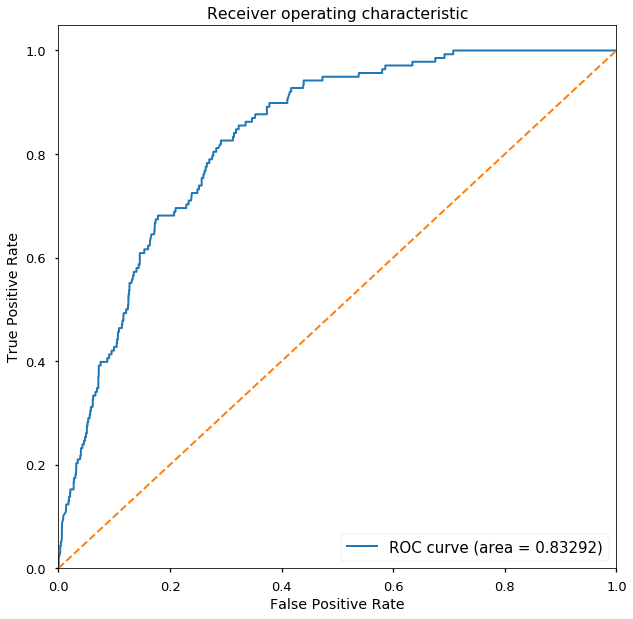

In [39]:
# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 10))
lw = 2
ax.plot(fpr, tpr,
         lw=lw, label=f'ROC curve (area = {roc_auc:.5f})')
ax.plot([0, 1], [0, 1], lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc="lower right", fontsize=15)
plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'XGB', 'ROC.png'))

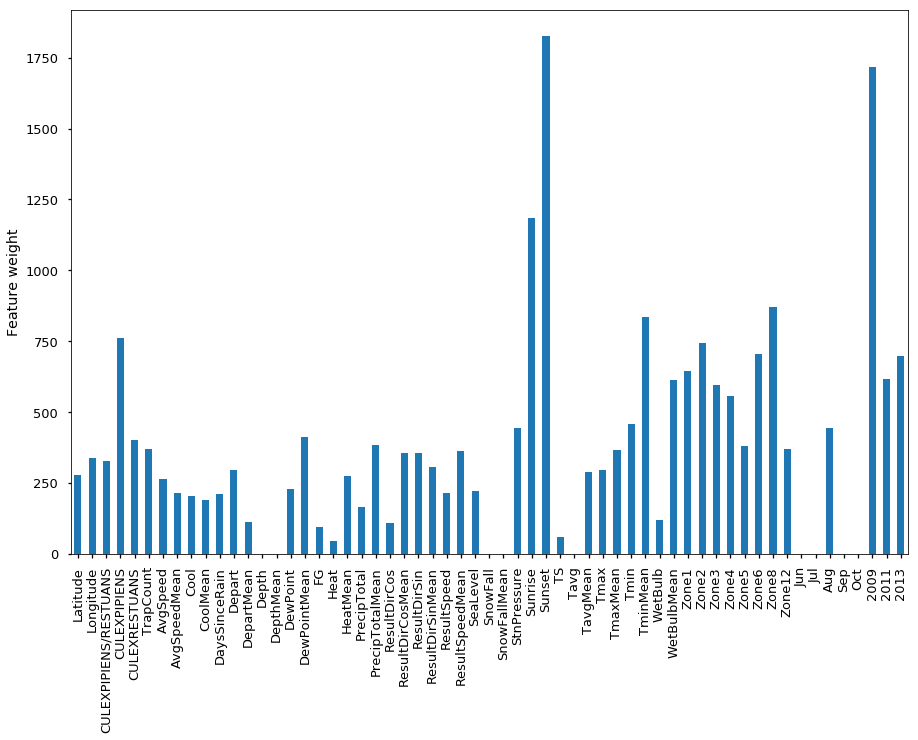

In [40]:
# Plot feature weights within model
fi = bst.get_score(importance_type='cover')
fi_ordered = pd.DataFrame(
        [fi[key] if key in fi.keys() else 0 for key in list(X_test.columns)])

fig, ax = plt.subplots(figsize=(15, 10))

fi_ordered.plot(kind='bar', ax=ax, legend=False)
ax.set_xticklabels(X_test.columns, rotation=90)

ax.set_ylabel('Feature weight')

plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'XGB', 'importances.png'))